# Food Delivery Time Prediction Case Study

In [1]:
import warnings
warnings.simplefilter('ignore')

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
d=pd.read_excel('Food Delivery Time Prediction Case Study.xlsx')
d

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [91]:
d.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3,30


# EDA

In [95]:
d['Time_taken(min)'].value_counts()

Time_taken(min)
26    2122
25    2047
27    1976
28    1965
29    1953
19    1824
15    1807
18    1763
16    1705
17    1695
24    1677
23    1641
20    1639
22    1626
21    1599
33    1258
30    1216
31    1213
34    1172
32    1123
38     886
36     852
39     846
35     832
37     828
11     757
10     750
12     745
14     738
13     716
43     566
42     561
40     555
41     553
44     553
47     295
49     280
48     276
46     274
45     241
53     100
51      94
54      91
52      79
50      72
Name: count, dtype: int64

### CountPlot

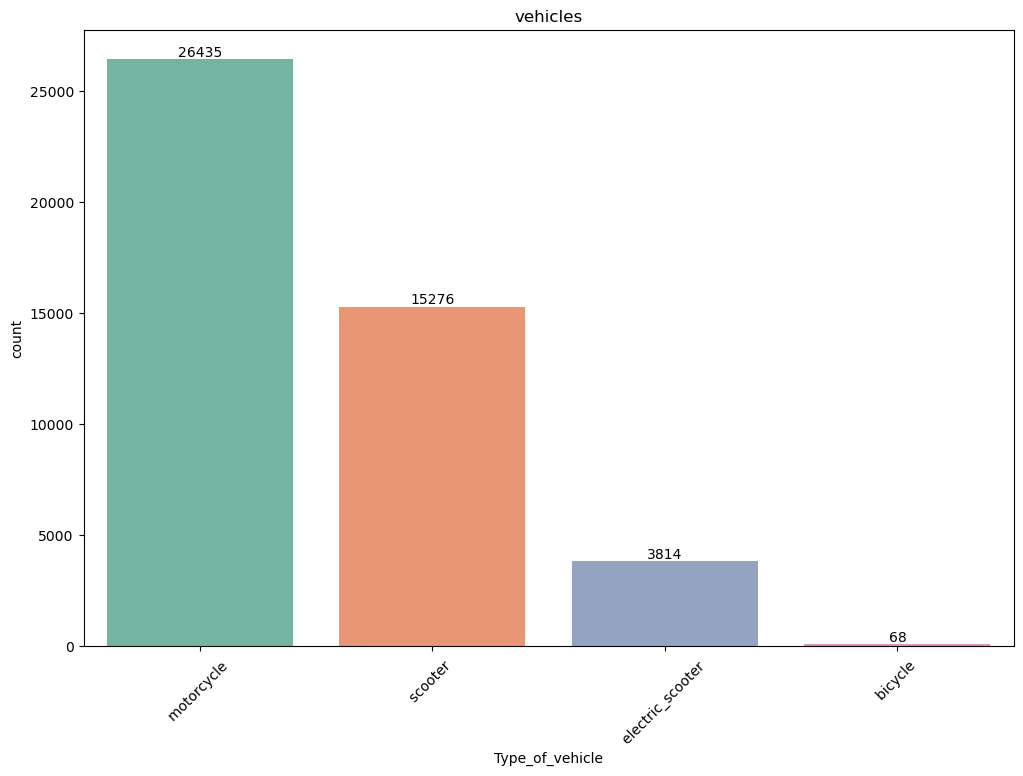

In [4]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=d,x='Type_of_vehicle',palette='Set2')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.title("vehicles")
plt.show()

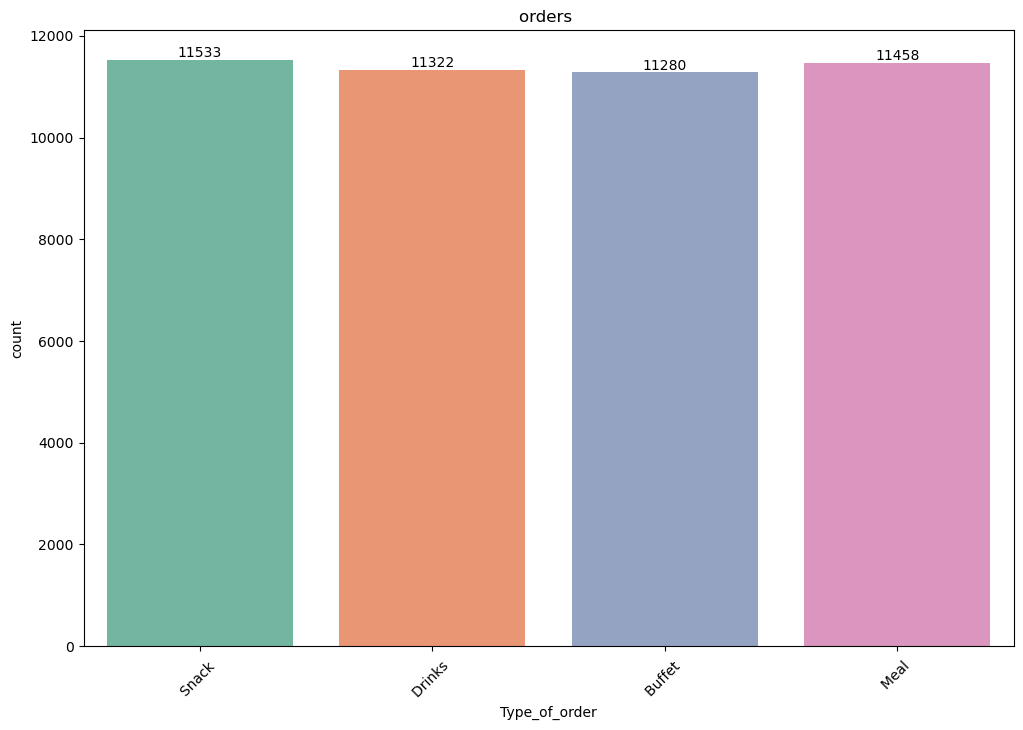

In [5]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=d,x='Type_of_order',palette='Set2')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.title("orders ")
plt.show()

### HistPlot

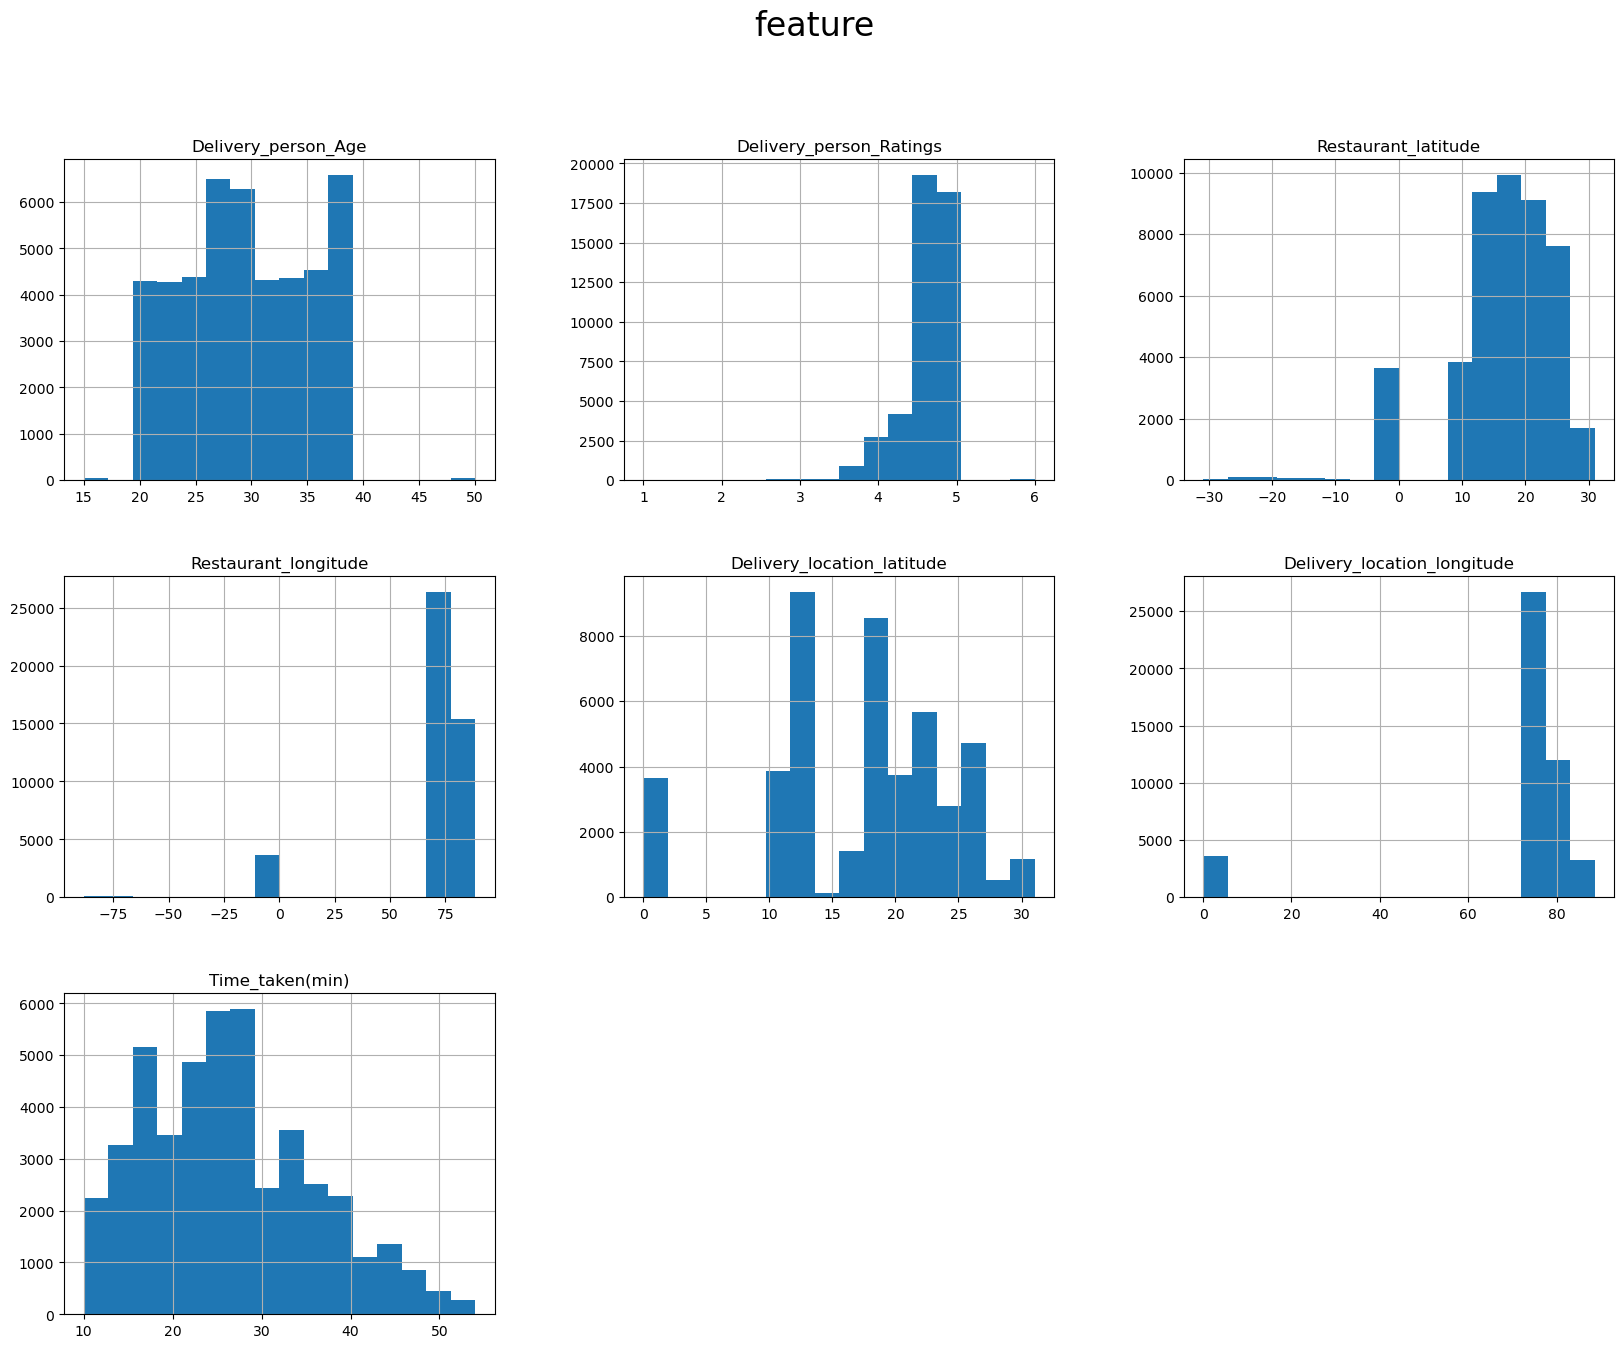

In [6]:
d.hist(figsize=(20,15),bins=16)
plt.suptitle("feature",fontsize=24)
plt.show()

### PairPlot

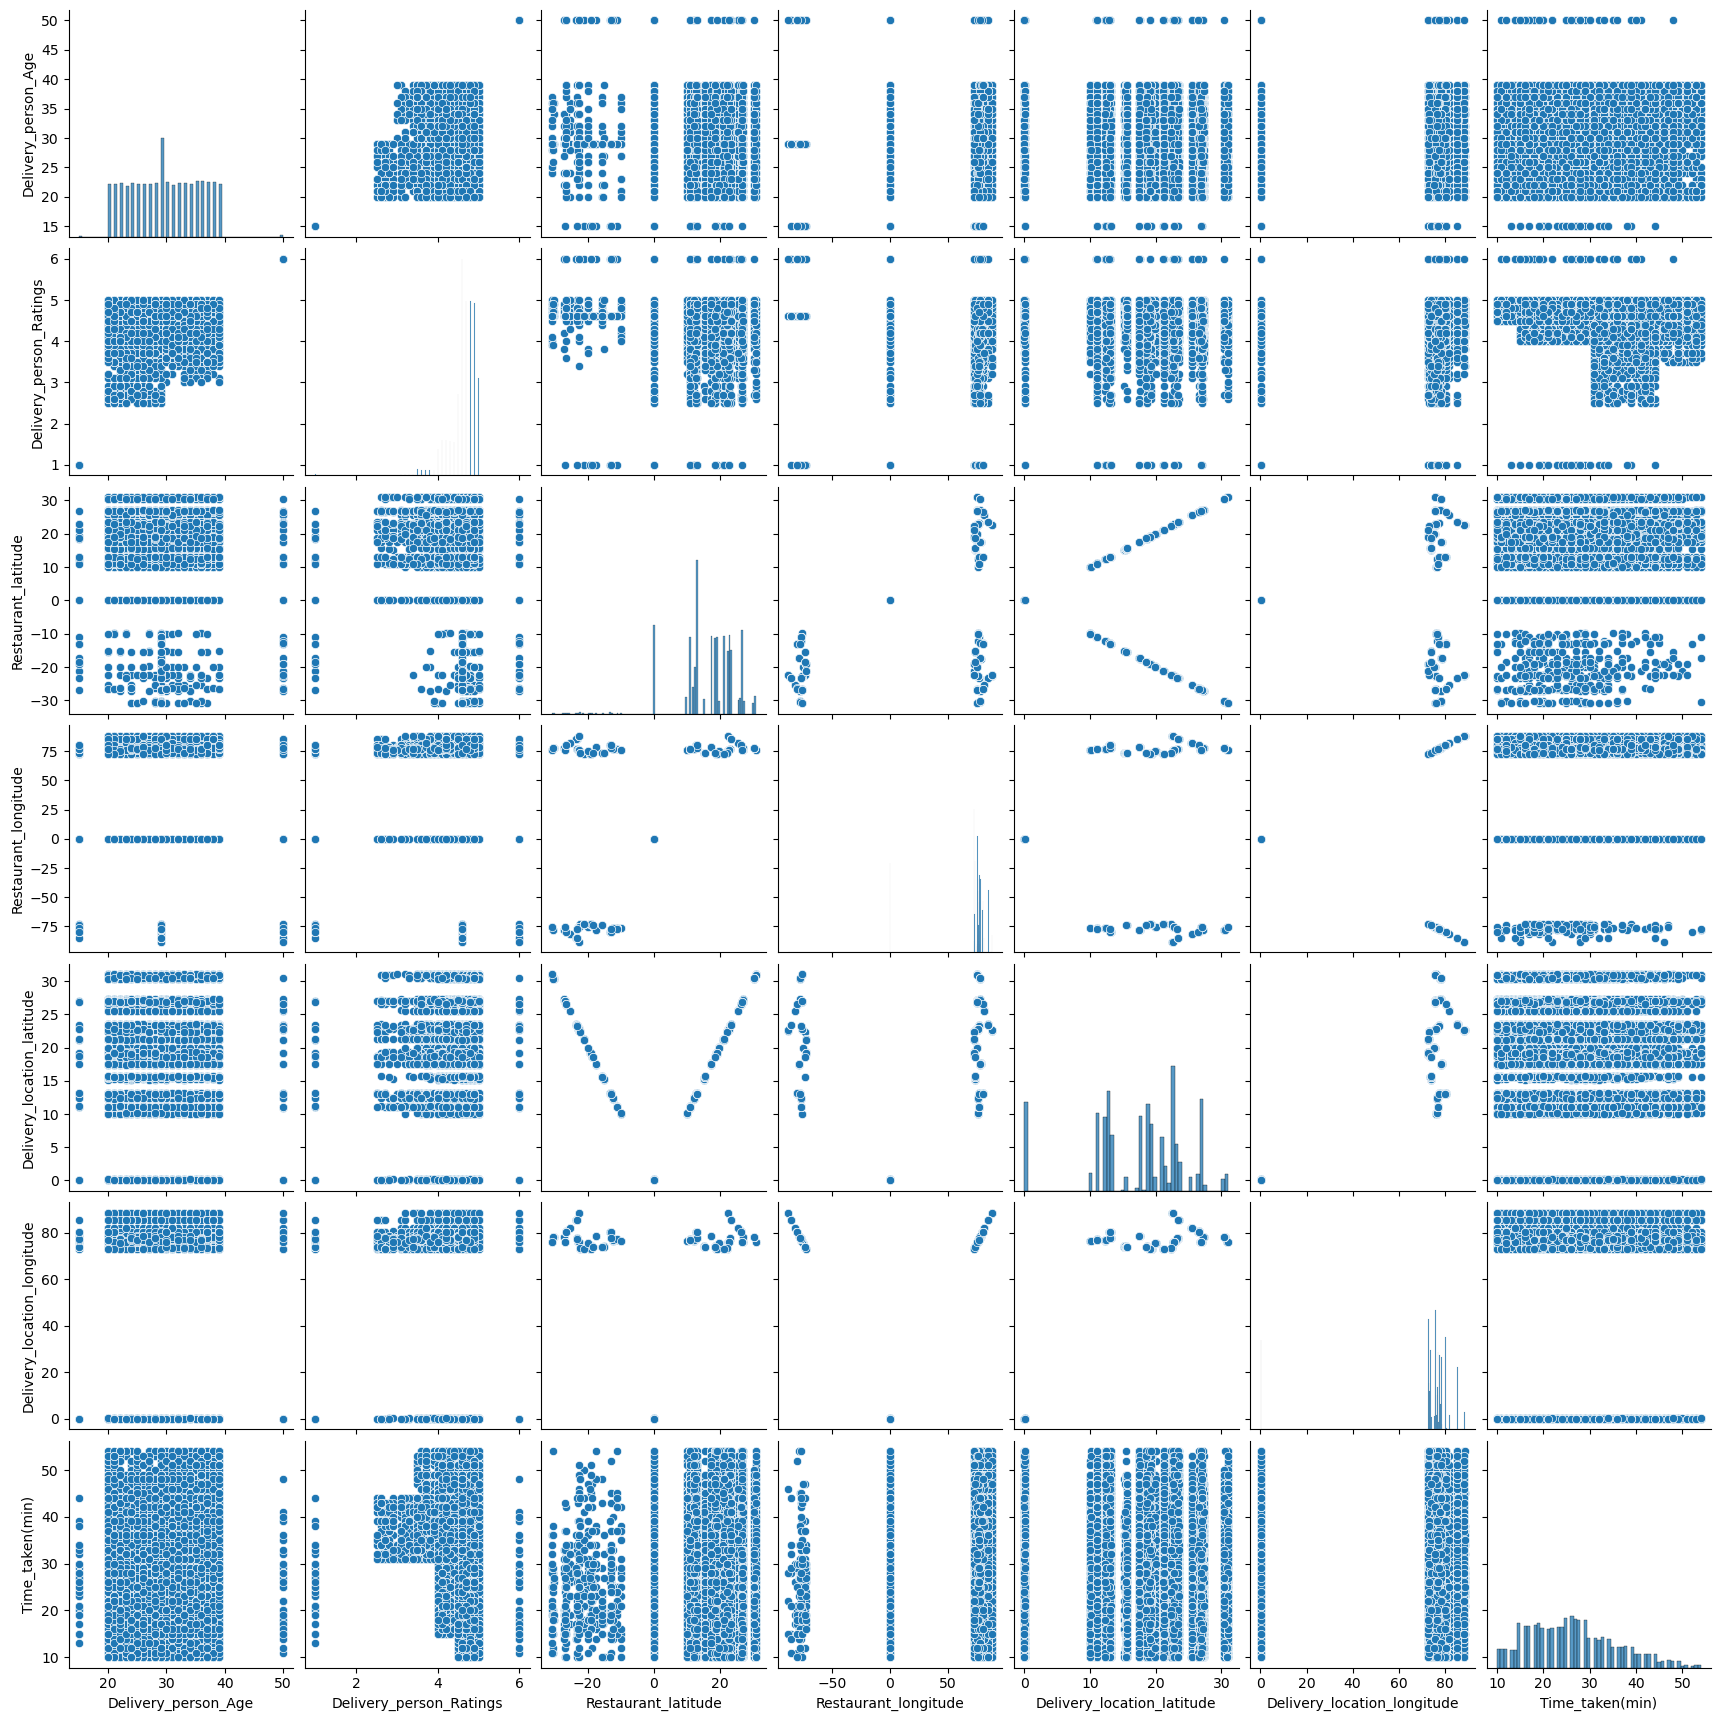

In [7]:
sns.pairplot(d)
plt.show()

### Boxplot

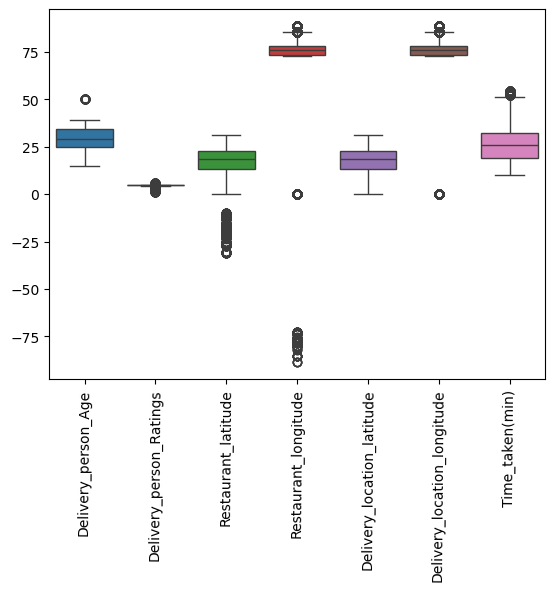

In [8]:
sns.boxplot(d)
plt.xticks(rotation=89.5)
plt.show()

# Correlation HeatMap

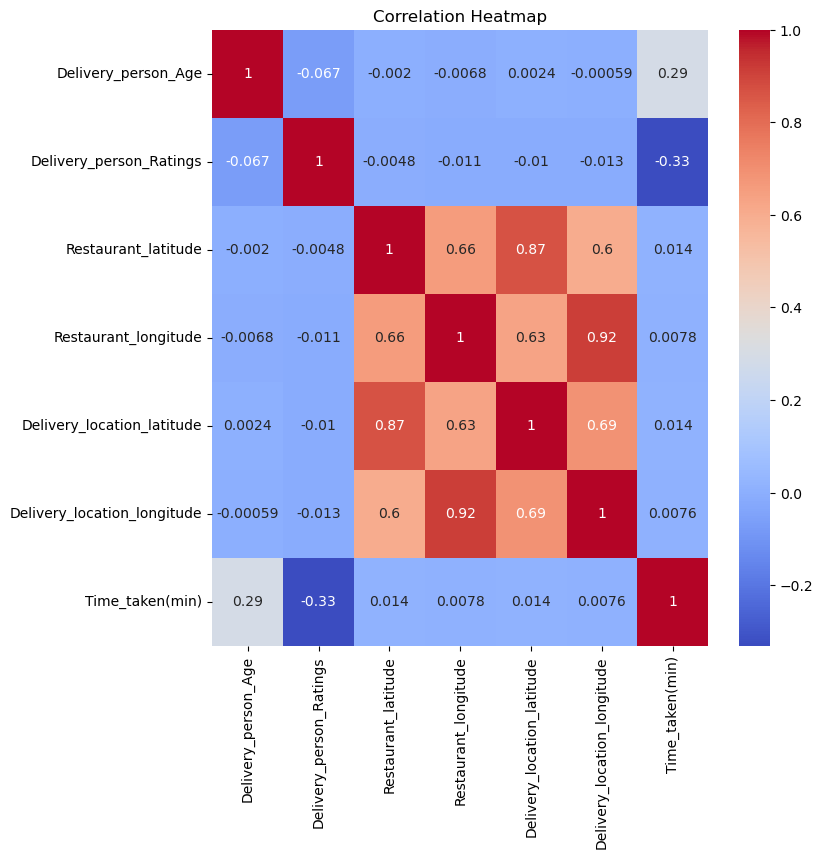

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(d.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Outerliear Detection

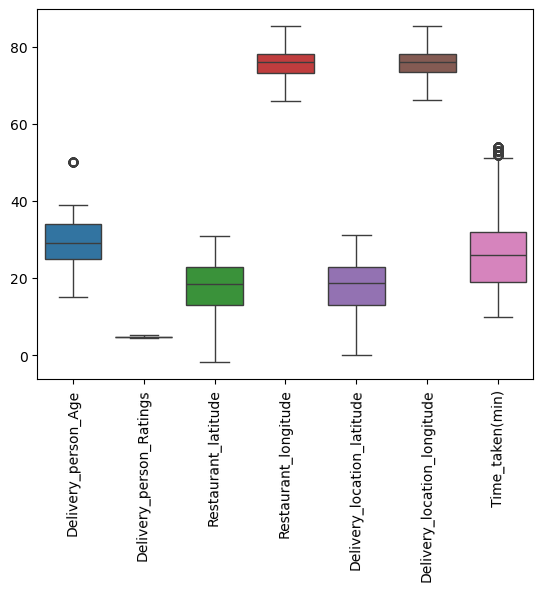

In [10]:
list=["Delivery_person_Ratings","Restaurant_latitude","Restaurant_longitude","Delivery_location_longitude"]
for i in list:
  Q1=d[i].quantile(0.25)
  Q3=d[i].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  d.loc[(d[i]>=upper_limit),i]=upper_limit
  d.loc[(d[i]<=lower_limit),i]=lower_limit
sns.boxplot(d)

plt.xticks(rotation=89.5)
plt.show()

# Preprocessing

In [11]:
d=d.drop(columns=['Delivery_person_ID','ID'],axis=1)
d

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,21,4.6,0.000000,65.858857,0.070000,66.039434,Buffet,motorcycle,36
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [12]:
d.isna().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [13]:
d.dtypes

Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
dtype: object

In [14]:
d.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')

In [15]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  int64  
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Type_of_order                45593 non-null  object 
 7   Type_of_vehicle              45593 non-null  object 
 8   Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 3.1+ MB


In [16]:
d.shape

(45593, 9)

In [17]:
d.describe() 

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.671682,17.193021,75.952494,17.465186,76.063022,26.294607
std,5.696793,0.214614,7.536572,4.426499,7.335122,4.361589,9.383806
min,15.000000,4.300000,-1.759034,65.858857,0.010000,66.039434,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,5.100000,30.914057,85.355237,31.054057,85.347610,54.000000


In [18]:
d.duplicated().sum()

32

In [19]:
d.duplicated().count()

45593

In [20]:
d.drop_duplicates(inplace=True)

In [21]:
d.duplicated().count()

45561

In [22]:
d.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [23]:
d.tail()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,21,4.6,0.000000,65.858857,0.070000,66.039434,Buffet,motorcycle,36
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26
45592,23,4.9,23.351058,85.325731,23.431058,85.347610,Snack,scooter,36


In [24]:
d.size

410049

In [25]:
d['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [26]:
d.isna().sum()/d.shape[0]*100

Delivery_person_Age            0.0
Delivery_person_Ratings        0.0
Restaurant_latitude            0.0
Restaurant_longitude           0.0
Delivery_location_latitude     0.0
Delivery_location_longitude    0.0
Type_of_order                  0.0
Type_of_vehicle                0.0
Time_taken(min)                0.0
dtype: float64

In [27]:
d.nunique()

Delivery_person_Age              22
Delivery_person_Ratings          10
Restaurant_latitude             390
Restaurant_longitude            369
Delivery_location_latitude     4373
Delivery_location_longitude    3994
Type_of_order                     4
Type_of_vehicle                   4
Time_taken(min)                  45
dtype: int64

In [28]:
d.isna().any()

Delivery_person_Age            False
Delivery_person_Ratings        False
Restaurant_latitude            False
Restaurant_longitude           False
Delivery_location_latitude     False
Delivery_location_longitude    False
Type_of_order                  False
Type_of_vehicle                False
Time_taken(min)                False
dtype: bool

### LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le1=LabelEncoder()

In [31]:
d["Type_of_order"]=le1.fit_transform(d["Type_of_order"])

In [32]:
le2=LabelEncoder()

In [33]:
d["Type_of_vehicle"]=le2.fit_transform(d["Type_of_vehicle"]) 

In [34]:
d

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3,30
...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,2,2,32
45589,21,4.6,0.000000,65.858857,0.070000,66.039434,0,2,36
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,1,3,16
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,3,2,26


# Define features & Target 

In [35]:
x=d.drop(["Time_taken(min)"],axis=1)


In [36]:
x

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle
0,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3
2,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2
3,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2
4,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3
...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,2,2
45589,21,4.6,0.000000,65.858857,0.070000,66.039434,0,2
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,1,3
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,3,2


In [37]:
y=d["Time_taken(min)"]


In [38]:
y

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45561, dtype: int64

# Splitting Data

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=48)

# Standardize Numerical Feature

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler

In [120]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [122]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Applying Multiple ML Models

In [123]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# LinearRegression

In [131]:
linear=LinearRegression()

In [132]:
linear.fit(x_train,y_train)

LinearRegression()

In [133]:
p=linear.predict(x_test)
p

array([25.3762817 , 26.46280141, 25.11462683, ..., 24.64456023,
       25.28182052, 18.48599317])

In [134]:
y_testpred = linear.predict(x_test)
y_trainpred = linear.predict(x_train)
print('Test R2 score:', linear.score(x_test, y_test))
print('Train R2 score:', linear.score(x_train, y_train))
print('Test Mean Squared Error:', mean_squared_error(y_test, y_testpred))
print('Train Mean Squared Error:', mean_squared_error(y_train, y_trainpred))

Test R2 score: 0.18063866419034091
Train R2 score: 0.17602470383486069
Test Mean Squared Error: 72.0909406671926
Train Mean Squared Error: 72.58947048862144


In [129]:
print("Coefficients:", linear.coef_)
print("Intercept:", linear.intercept_)
print("Mean Squared Error (Test):", mean_squared_error(y_test, y_testpred))
print("R2 Score (Test):", r2_score(y_test, y_testpred))

Coefficients: [ 2.42610433 -2.78220579  0.28064642 -0.86616793 -0.21425497  0.91482058
  0.01842577 -0.65613571]
Intercept: 26.319954847610685
Mean Squared Error (Test): 72.18232302854223
R2 Score (Test): 0.1780078531922461


# Lasso 

In [106]:
lasso = make_pipeline(StandardScaler(), Lasso(alpha=1.0))  # Default alpha=1.0
lasso.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [107]:
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

In [108]:
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred) * 100)
print("Test MSE:", mean_squared_error(y_test, y_test_pred) * 100)

Train R² Score: 0.14977708960176928
Test R² Score: 0.15385383607608927
Train MSE: 7490.179760284096
Test MSE: 7444.758525118115


# Ridge

In [53]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

Ridge()

In [54]:
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

In [55]:
print("Train R² Score:", ridge.score(x_train, y_train))
print("Test R² Score:", ridge.score(x_test, y_test))
print("Train MSE:", mean_squared_error(y_train, y_train_pred) * 100)
print("Test MSE:", mean_squared_error(y_test, y_test_pred) * 100)

Train R² Score: 0.17739563681944703
Test R² Score: 0.17751025798654485
Train MSE: 7240.523343165622
Test MSE: 7251.55796662489


# AdaBoostRegressor

In [56]:
adb=AdaBoostRegressor()

In [57]:
adb.fit(x_train,y_train)

AdaBoostRegressor()

In [58]:
p1=adb.predict(x_test)
p1

array([36.1505452 , 25.96220852, 30.85557211, ..., 30.85557211,
       25.96220852, 36.40252454])

In [59]:
y_testpred = adb.predict(x_test)
y_trainpred = adb.predict(x_train)
print('Test R2 score:', adb.score(x_test, y_test))
print('Train R2 score:', adb.score(x_train, y_train))
print('Test Mean Squared Error:', mean_squared_error(y_test, y_testpred))
print('Train Mean Squared Error:', mean_squared_error(y_train, y_trainpred))

Test R2 score: 0.25424855194503126
Train R2 score: 0.25693613637240853
Test Mean Squared Error: 65.74987599269765
Train Mean Squared Error: 65.40411759130824


In [60]:
print("Feature Importances:", adb.feature_importances_)
print("Mean Squared Error (Test):", mean_squared_error(y_test, y_testpred))
print("R2 Score (Test):", r2_score(y_test, y_testpred))

Feature Importances: [0.34580847 0.47497569 0.         0.00122241 0.00509516 0.00087403
 0.         0.17202423]
Mean Squared Error (Test): 65.74987599269765
R2 Score (Test): 0.25424855194503126


# RandomForestRegressor

In [61]:
rft=RandomForestRegressor() 

In [62]:
rft.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
p2=rft.predict(x_test)
p2

array([32.82      , 26.34      , 26.99      , ..., 23.18666667,
       24.91      , 29.        ])

In [64]:
y_testpred = rft.predict(x_test)
y_trainpred = rft.predict(x_train)
print('Test R2 score:',rft.score(x_test, y_test))
print('Train R2 score:', rft.score(x_train, y_train))
print('Test Mean Squared Error:', mean_squared_error(y_test, y_testpred))
print('Train Mean Squared Error:', mean_squared_error(y_train, y_trainpred))

Test R2 score: 0.2718935191697204
Train R2 score: 0.8940528167150024
Test Mean Squared Error: 64.1941909049323
Train Mean Squared Error: 9.325419217953971


In [87]:
print("Feature Importances:",adb.feature_importances_)
print("Mean Squared Error (Test):", mean_squared_error(y_test, y_testpred))
print("R2 Score (Test):", r2_score(y_test, y_testpred))

Feature Importances: [0.34580847 0.47497569 0.         0.00122241 0.00509516 0.00087403
 0.         0.17202423]
Mean Squared Error (Test): 81.63054722657894
R2 Score (Test): 0.07412594556808472


# DecisionTreeRegressor

In [66]:
dtr=DecisionTreeRegressor()

In [67]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [68]:
p3=dtr.predict(x_test)
p3

array([33., 22., 22., ..., 16., 33., 28.])

In [69]:
y_testpred=dtr.predict(x_test)
y_trainpred=dtr.predict(x_train)
print('Test score:',dtr.score(x_test,y_test))
print('Train score:',dtr.score(x_train,y_train))
print('Test accuaracy:',mean_squared_error(y_test,y_testpred)*100)
print('Train accuaracy:',mean_squared_error(y_train,y_trainpred)*100)

Test score: -0.3653617017455302
Train score: 0.9916860466566367
Test accuaracy: 12037.839525365587
Train accuaracy: 73.17901041013421


# SVR

In [70]:
svr=SVR()

In [71]:
svr.fit(x_train,y_train)

SVR()

In [72]:
p4=svr.predict(x_test)
p4

array([35.85256781, 22.7995439 , 27.22928552, ..., 27.72937255,
       22.05166582, 34.34172012])

In [73]:
y_testpred=svr.predict(x_test)
y_trainpred=svr.predict(x_train)
print('Test score:',svr.score(x_test,y_test))
print('Train score:',svr.score(x_train,y_train))
print('Test accuaracy:',mean_squared_error(y_test,y_testpred)*100)
print('Train accuaracy:',mean_squared_error(y_train,y_trainpred)*100)

Test score: 0.2506727899049356
Train score: 0.2569625352637923
Test accuaracy: 6606.51364073155
Train accuaracy: 6540.179397380932


# XGBRegressor

In [80]:
xgb=XGBRegressor()

In [81]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [82]:
p5=xgb.predict(x_test)
p5

array([35.35827 , 33.086777, 26.373808, ..., 22.14748 , 29.234327,
       38.357224], dtype=float32)

In [83]:
y_testpred=xgb.predict(x_test)
y_trainpred=xgb.predict(x_train)
print('Test score:',xgb.score(x_test,y_test))
print('Train score:',xgb.score(x_train,y_train))
print('Test accuaracy:',mean_squared_error(y_test,y_testpred)*100)
print('Train accuaracy:',mean_squared_error(y_train,y_trainpred)*100)

Test score: 0.07412594556808472
Train score: 0.5109821557998657
Test accuaracy: 8163.054722657894
Train accuaracy: 4304.311639399068
